# Introduction to Data Science: Data Cleaning

In [1]:
import json
import requests
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)

## Functions

In [2]:
def grab_json(req, key=False):
    """
    Grab info specified in `spec.json`.
    
    req: str
    Returns: dict
    """
    api = "https://api.opendota.com/api"
    req = api + req
    payload = {}
    if key:
        with open("api_key.txt") as f:
            key = f.read()
        payload['api_key'] = key
        
    r = requests.get(req, params=payload)
    return r.json()

## Organize Player Data

In [3]:
player = pd.DataFrame(grab_json("/players/37244929/recentMatches"))
player.columns

Index(['match_id', 'player_slot', 'radiant_win', 'duration', 'game_mode',
       'lobby_type', 'hero_id', 'start_time', 'version', 'kills', 'deaths',
       'assists', 'skill', 'xp_per_min', 'gold_per_min', 'hero_damage',
       'tower_damage', 'hero_healing', 'last_hits', 'lane', 'lane_role',
       'is_roaming', 'cluster', 'leaver_status', 'party_size'],
      dtype='object')

In [4]:
player = player[["hero_id", "kills", "deaths", "assists", "skill", "xp_per_min", "gold_per_min", "hero_damage",
        "tower_damage", "hero_healing", "last_hits", "lane", "lane_role", "duration"]]

player.head()

,hero_id,kills,deaths,assists,skill,xp_per_min,gold_per_min,hero_damage,tower_damage,hero_healing,last_hits,lane,lane_role,duration
0,111,1,7,9,1.0,208,153,3913,68,8797,6,3.0,1.0,2033
1,111,4,6,14,2.0,375,251,5935,74,4007,24,1.0,1.0,2201
2,64,7,6,20,2.0,509,341,22915,1254,0,84,3.0,1.0,2982
3,111,3,8,22,NaN,515,278,9379,265,10056,28,5.0,4.0,2500
4,111,7,8,9,NaN,336,233,12975,161,15955,34,1.0,1.0,3201


In [5]:
# TODO: make gpm, kpm, lpm

## Organize Hero Data

In [24]:
heroes = pd.DataFrame(grab_json("/heroStats"))
heroes = heroes[["id", "localized_name", "primary_attr", "attack_type", "base_health", "base_health_regen", "base_mana",
        "base_mana_regen", "base_armor", "base_mr", "base_attack_min", "base_attack_max", "base_str",
        "base_agi", "base_int", "str_gain", "int_gain", "attack_range", "projectile_speed", "attack_rate",
        "move_speed", "turn_rate"]]

heroes.head()

,id,localized_name,primary_attr,attack_type,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,...,base_str,base_agi,base_int,str_gain,int_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,1,Anti-Mage,agi,Melee,200,0.25,75,0.0,-1.0,25,...,23,24,12,1.3,1.8,150,0,1.4,310,0.5
1,2,Axe,str,Melee,200,2.75,75,0.0,-1.0,25,...,25,20,18,3.6,1.6,150,900,1.7,310,0.6
2,3,Bane,int,Ranged,200,NaN,75,0.0,1.0,25,...,23,23,23,2.6,2.6,400,900,1.7,305,0.6
3,4,Bloodseeker,agi,Melee,200,NaN,75,0.0,2.0,25,...,24,22,18,2.7,1.7,150,900,1.7,300,0.5
4,5,Crystal Maiden,int,Ranged,200,NaN,75,1.0,-1.0,25,...,18,16,14,2.2,3.3,600,900,1.7,275,0.5


### Turn json dictionary of hero data into pandas dataframe

In [26]:
hero_ids = list(heroes["id"])
stats = ['gold_per_min', 'xp_per_min', 'kills_per_min', 'last_hits_per_min', 'hero_damage_per_min', 'tower_damage']

hero_stats = []
for i, hero_id in enumerate(hero_ids):
    hero = grab_json(f"/benchmarks/?hero_id={hero_id}", key=True)
    output = {}
    output["id"] = hero_id
    output["localized_name"] = heroes.loc[i, "localized_name"]
    for stat in stats:
        output[stat] = hero['result'][stat][4]['value']
    hero_stats.append(output)
    
hero_stats = pd.DataFrame(hero_stats)
hero_stats

,id,localized_name,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
0,1,Anti-Mage,618,741,0.193315,9.494949,488.074150,5721
1,2,Axe,406,559,0.185471,4.185137,532.148438,962
2,3,Bane,262,437,0.078560,0.758853,271.457801,350
3,4,Bloodseeker,490,641,0.227488,5.829545,631.144481,2797
4,5,Crystal Maiden,281,434,0.080754,1.357814,360.614224,299
5,6,Drow Ranger,494,617,0.190880,6.192893,588.543165,5347
6,7,Earthshaker,315,490,0.096899,2.207732,403.838384,465
7,8,Juggernaut,534,663,0.207809,7.174571,581.085044,4811
8,9,Mirana,331,494,0.120289,2.486884,374.505988,1015
9,10,Morphling,535,677,0.238569,7.009346,633.249097,5755


## Basic Plotting + Clustering

### Add hero type information

In [27]:
# hero_stats["primary_attr"] = heroes["primary_attr"]
hero_stats.insert(0, "Primary Attribute", heroes["primary_attr"])
hero_stats.head()

,Primary Attribute,id,localized_name,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
0,agi,1,Anti-Mage,618,741,0.193315,9.494949,488.074150,5721
1,str,2,Axe,406,559,0.185471,4.185137,532.148438,962
2,int,3,Bane,262,437,0.078560,0.758853,271.457801,350
3,agi,4,Bloodseeker,490,641,0.227488,5.829545,631.144481,2797
4,int,5,Crystal Maiden,281,434,0.080754,1.357814,360.614224,299


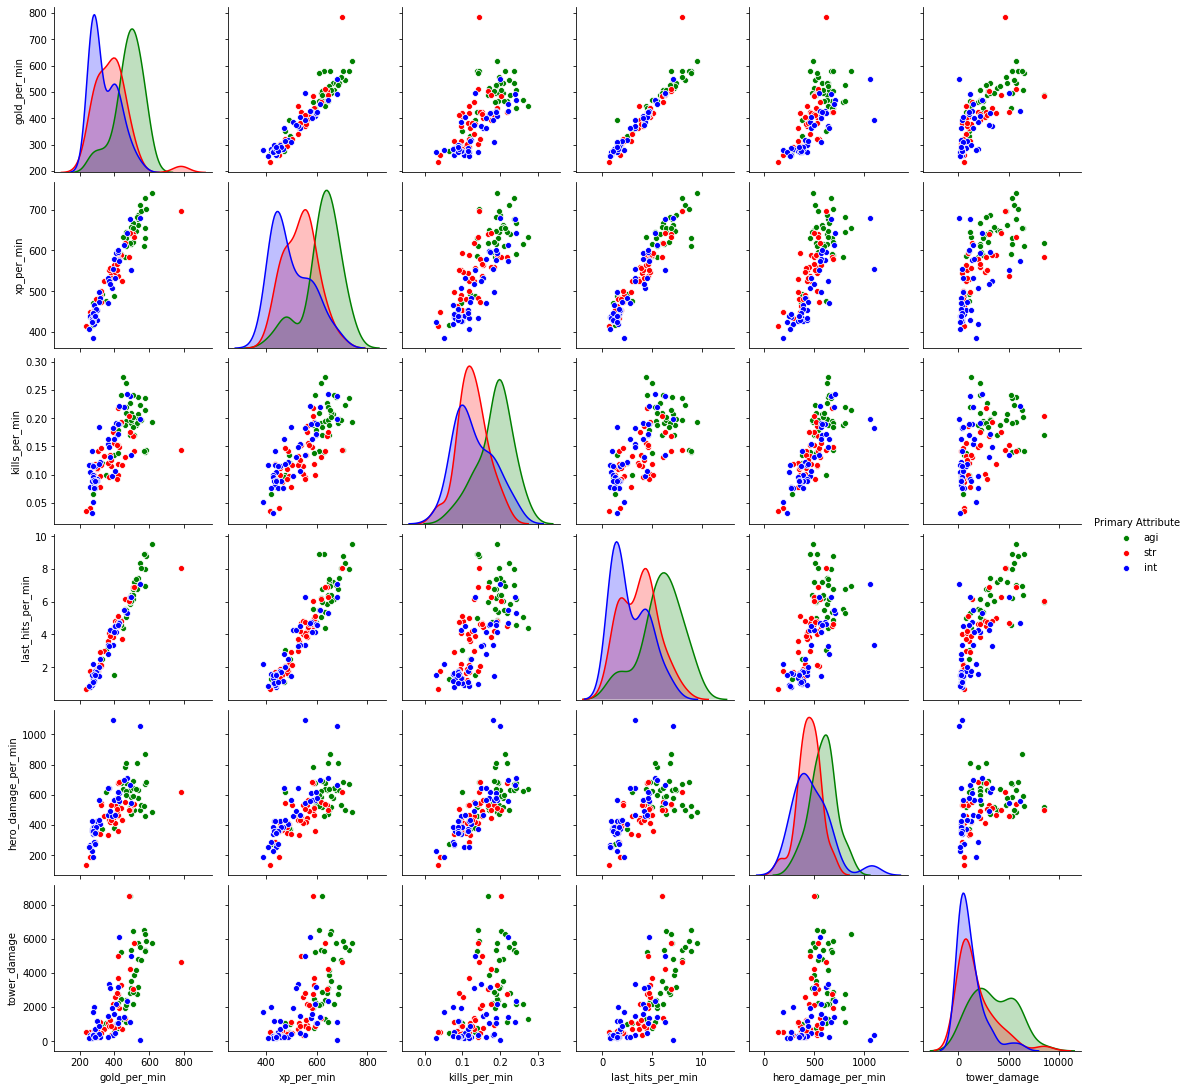

In [72]:
sns.pairplot(hero_stats.drop(["id", "localized_name", "ICA_scaled_0", "ICA_scaled_1"], axis=1), hue="Primary Attribute", 
             palette=["green", "red", "blue"])

plt.savefig("pairplot", bbox_inches="tight")

### PCA without normalization

In [29]:
palette = ["green", "red", "blue"]  # for plotting based on primary attribute

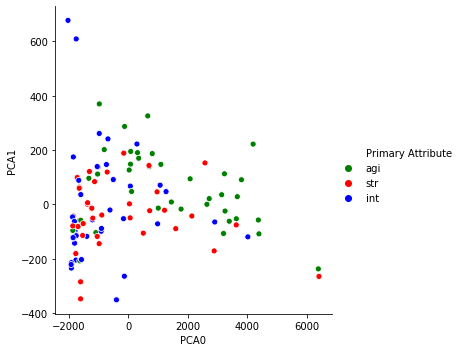

In [53]:
# clean data array
data = hero_stats.drop(["localized_name", "Primary Attribute", "id"], axis=1)

# pca
pca = PCA(n_components=2)
X_r = pca.fit(data).transform(data)

# make dataframe
pca_df = pd.DataFrame(X_r, columns=["PCA0", "PCA1"])
pca_df.insert(0, "Primary Attribute", heroes["primary_attr"])

# plot
pca1 = sns.relplot(x="PCA0", y="PCA1", hue="Primary Attribute", 
                   data=pca_df, palette=palette)
# todo / to try: different clustering methods, normalize data first, 
# figure out a way to plot so that you can figure out which hero is which
# don't plot with a huge legend

In [54]:
pca_df.head()

,Primary Attribute,PCA0,PCA1
0,agi,3634.600440,-52.694483
1,str,-1129.203438,83.884394
2,int,-1756.699190,-204.646614
3,agi,711.347858,139.164332
4,int,-1804.473081,-117.566996


### Pairplot with PCA features included

- Tower damage was almost completely linearly correlated with the first principal component
- Hero damage per minute had high linear correlation with the second

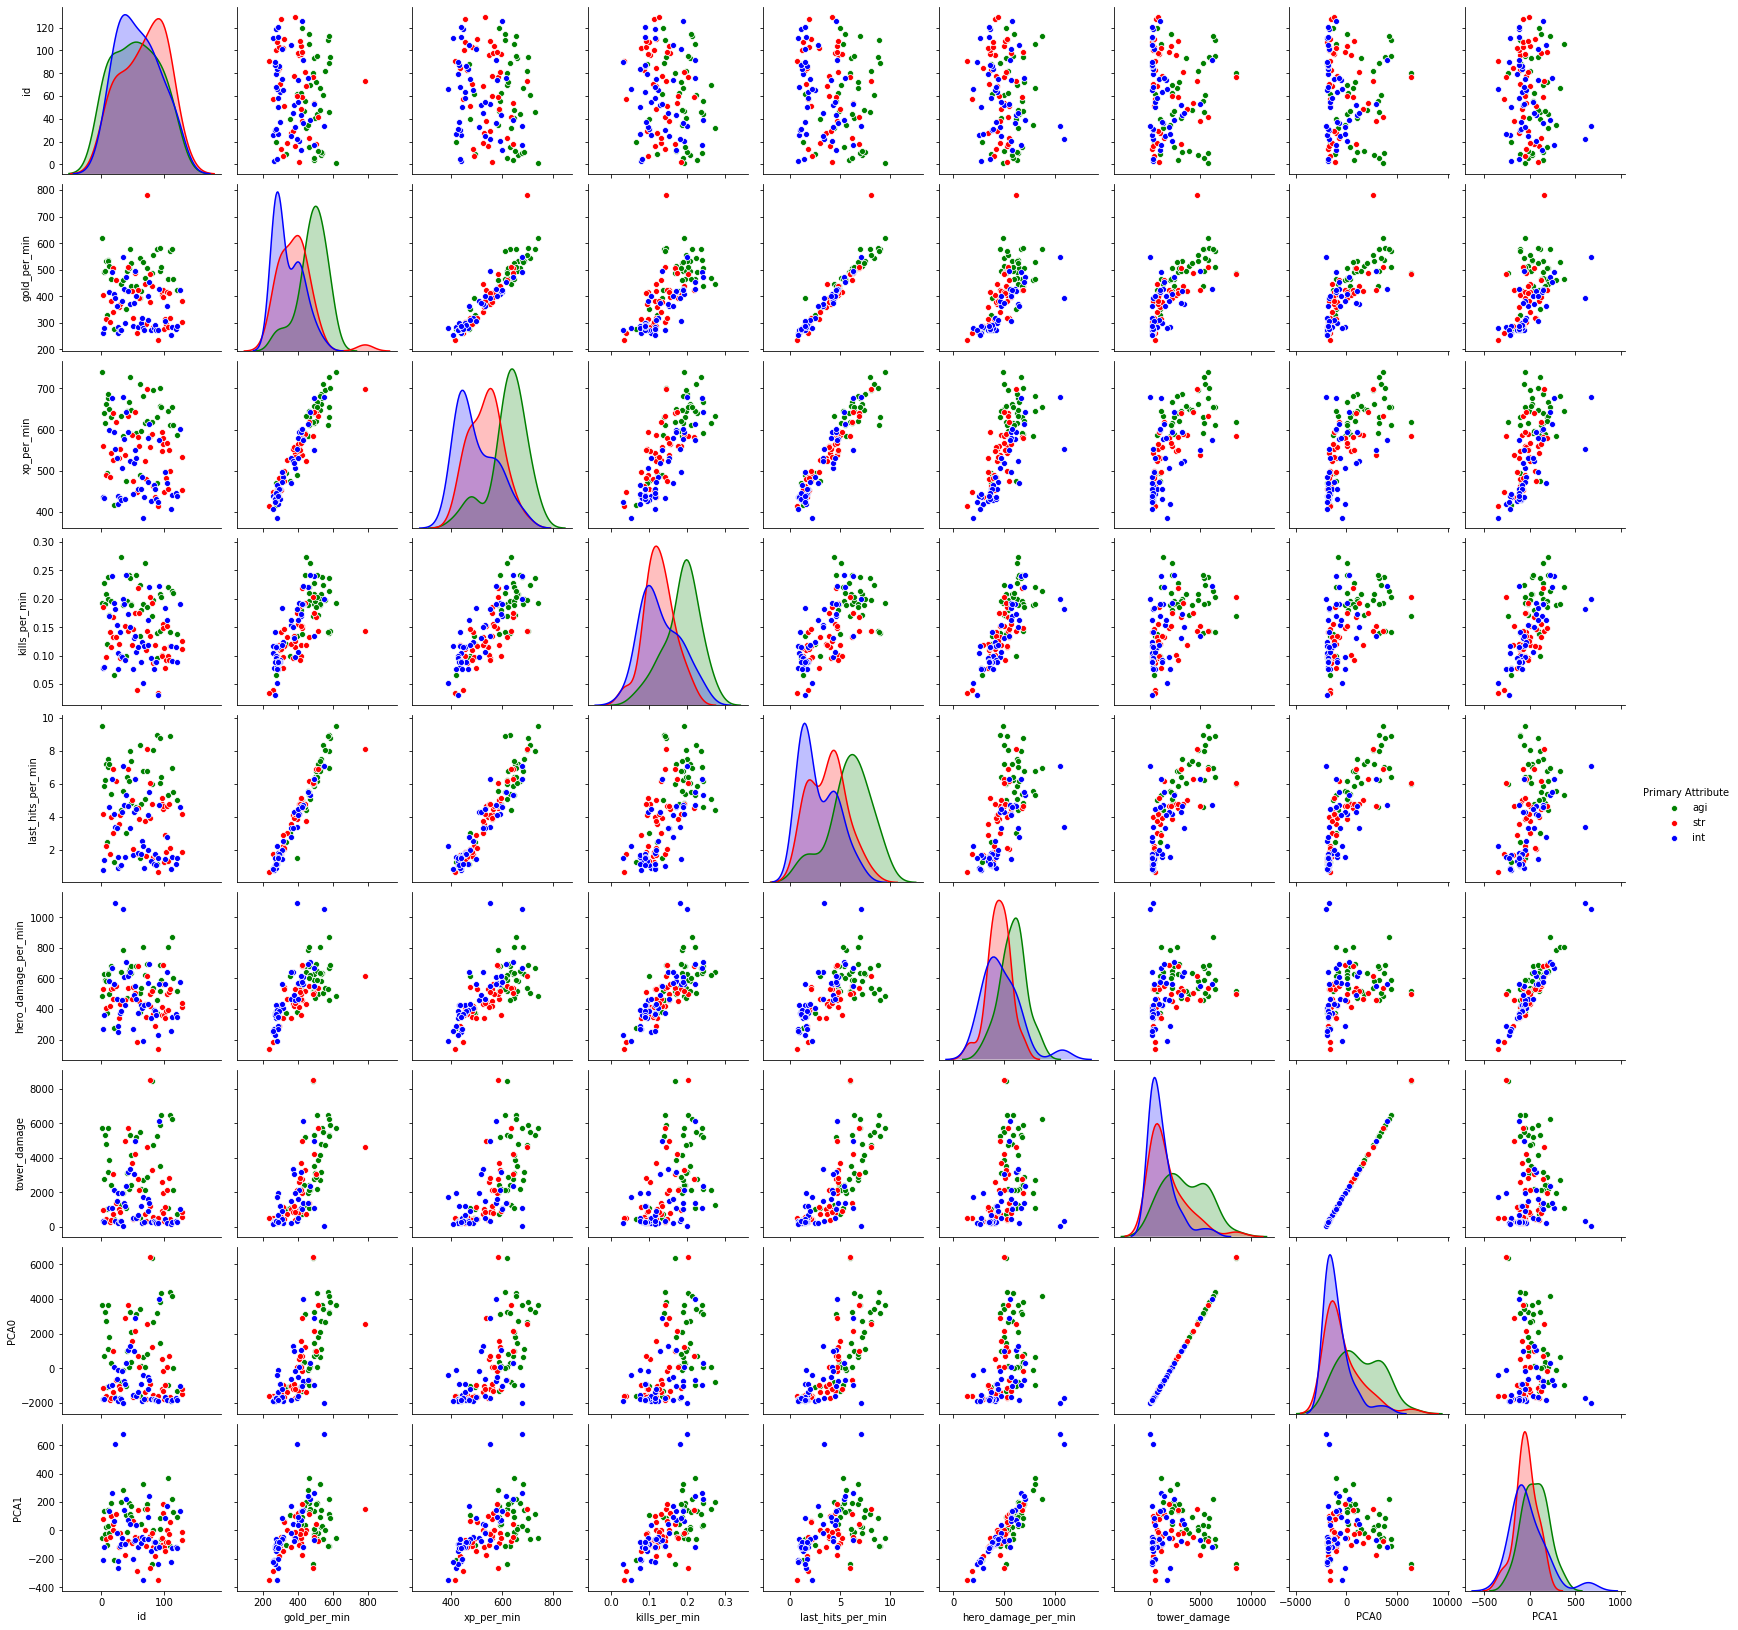

In [41]:
pairplot_data = hero_stats.drop("localized_name", axis=1)
pairplot_data["PCA0"] = pca_df["PCA0"]
pairplot_data["PCA1"] = pca_df["PCA1"]
sns.pairplot(pairplot_data, hue="Primary Attribute", 
             palette=["green", "red", "blue"])

## Need to do some preprocessing

#### Scale data to unit mean and variance

In [50]:
from sklearn import preprocessing
scaled = pd.DataFrame(preprocessing.scale(data), columns=data.columns)
scaled.head()

,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
0,2.122276,2.169180,0.859111,2.361482,-0.090589,1.813259
1,0.052187,0.100210,0.711566,0.032801,0.186638,-0.566107
2,-1.353911,-1.286682,-1.299649,-1.469836,-1.453109,-0.872089
3,0.872411,1.032383,1.501983,0.753976,0.809325,0.351341
4,-1.168384,-1.320786,-1.258376,-1.207155,-0.892314,-0.897588


### PCA with normalization

In [77]:
pca = PCA(n_components=2)
X_r = pca.fit(scaled).transform(scaled)
pca_df["PCA_normalized_0"] = X_r[:, 0]
pca_df["PCA_normalized_1"] = X_r[:, 1]

### Post-normalization pairplot
- before normalization, feature importance was disproportionately on tower damage and hero damage per minute
- after normalization, feature importance was more even

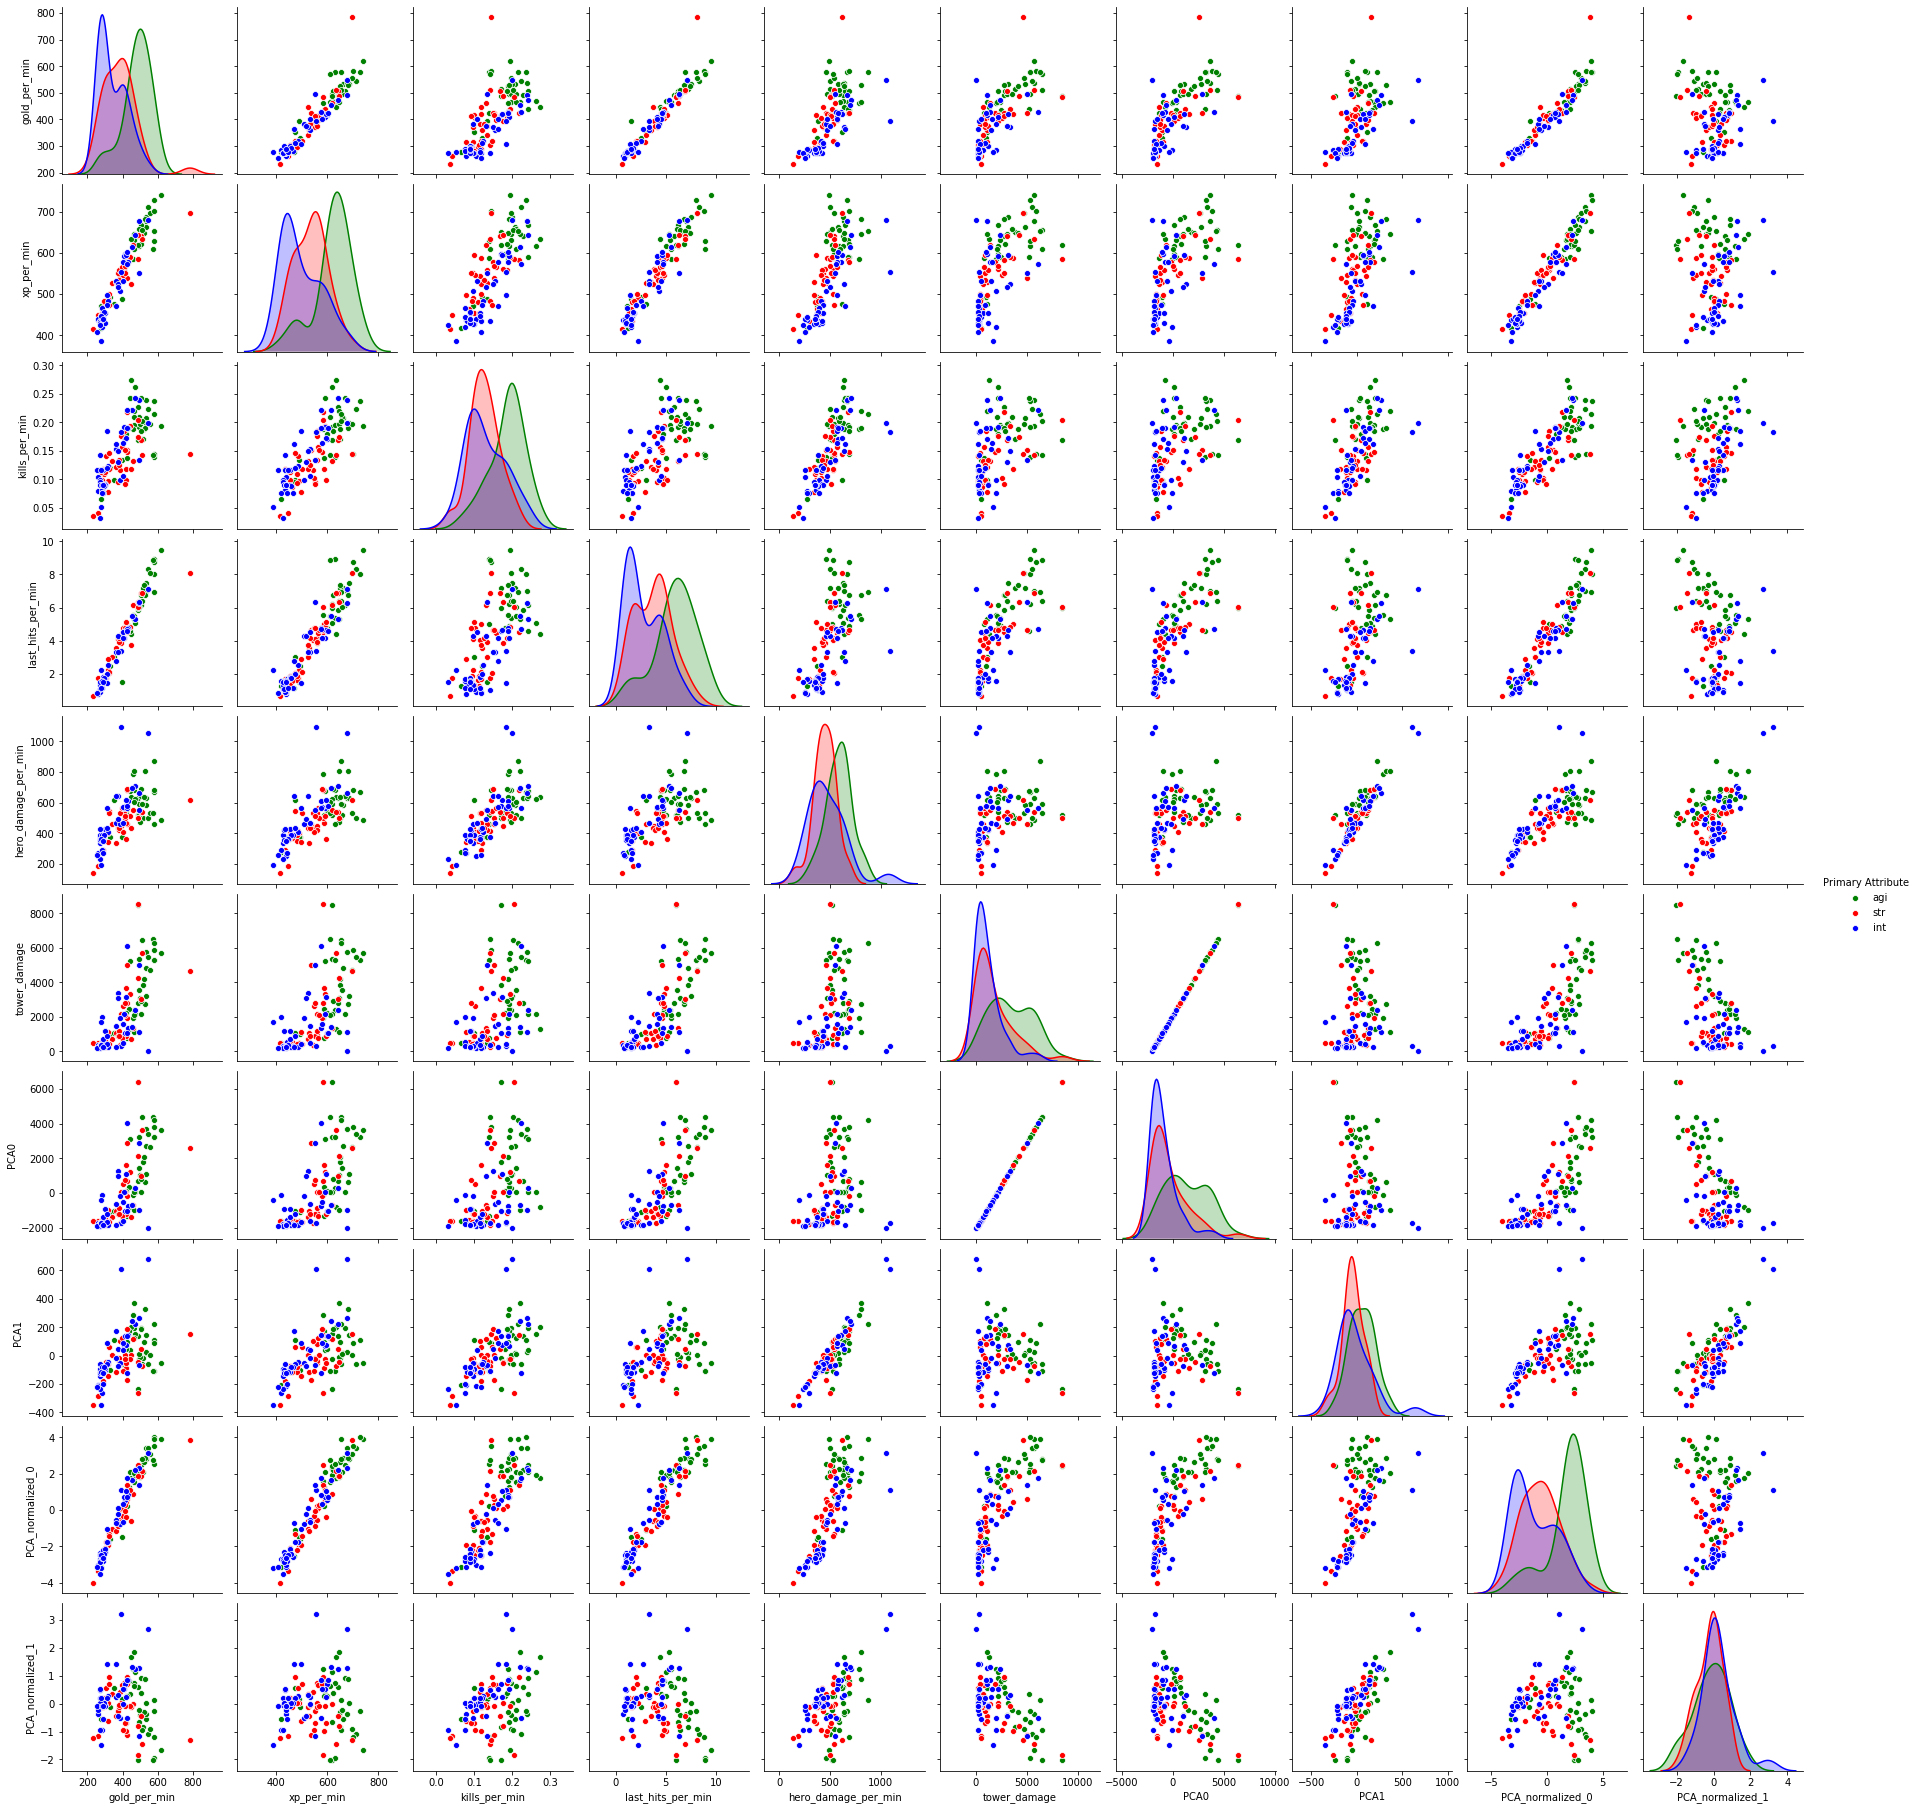

In [85]:
pairplot_data["PCA_normalized_0"] = X_r[:, 0]
pairplot_data["PCA_normalized_1"] = X_r[:, 1]
sns.pairplot(pairplot_data.drop("id", axis=1), hue="Primary Attribute", 
             palette=["green", "red", "blue"])

### Clustering better after normalization
- as we move along the X-axis in pca_normalized_0, we have heroes who are heavier cores.

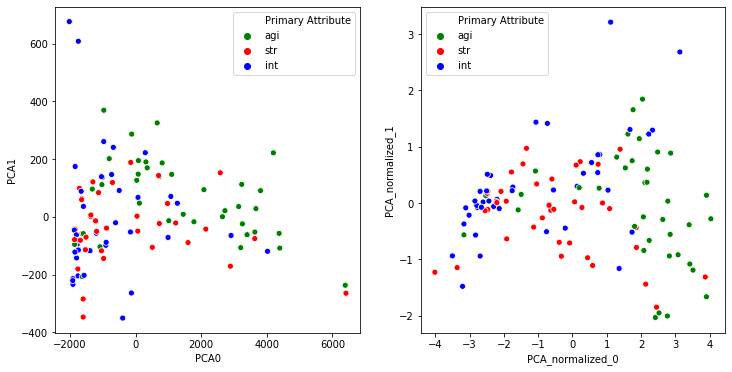

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x="PCA0", y="PCA1", hue="Primary Attribute", data=pca_df, palette=palette, ax=axes[0])
sns.scatterplot(x="PCA_normalized_0", y="PCA_normalized_1", hue="Primary Attribute", data=pca_df, palette=palette, ax=axes[1])

### First principal component contains core vs support information

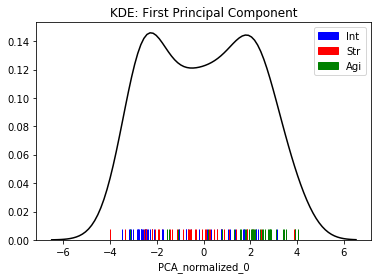

In [142]:
# color code by primary attribute
import matplotlib.patches as mpatches

colormap = {"agi": "green", "str": "red", "int": "blue"}
colors = list(pca_df["Primary Attribute"].map(colormap))

# kernel density estimation
sns.distplot(pca_df["PCA_normalized_0"], hist=False, rug=True, 
             rug_kws={"color": colors}, kde_kws={"color": "k"})
plt.title("KDE: First Principal Component");


# Make legend
intleg = mpatches.Patch(color='blue', label='Int')
strleg = mpatches.Patch(color='red', label='Str')
agileg = mpatches.Patch(color='green', label='Agi')
plt.legend(handles=[intlegend, strleg, agileg]);

plt.savefig("first_component.png", bbox_inches="tight")

### Sort by first principal component and see heroes

In [96]:
pca_df.insert(0, "Hero", hero_stats["localized_name"])
pca_df.sort_values("PCA_normalized_0")

,Hero,Primary Attribute,PCA0,PCA1,PCA_normalized_0,PCA_normalized_1,PCA_l2norm_0,PCA_l2norm_1,KPCA_scaled_0,KPCA_scaled_1,ICA_scaled_0,ICA_scaled_1
89,Io,str,-1598.454341,-347.355791,-4.010811,-1.226687,-0.932817,0.278570,-0.460571,0.123523,-0.053366,0.109993
88,Keeper of the Light,int,-1909.566371,-234.052127,-3.499934,-0.936956,-0.936303,0.265191,-0.461897,0.118258,-0.050205,0.110025
55,Omniknight,str,-1600.048423,-284.690984,-3.362277,-1.144921,-0.917732,0.313256,-0.452601,0.139387,-0.061637,0.109242
64,Chen,int,-393.962496,-350.922895,-3.204092,-1.477255,-0.884291,0.410842,-0.434115,0.181242,-0.084795,0.108121
2,Bane,int,-1756.699190,-204.646614,-3.164390,-0.370278,-0.960171,0.097805,-0.475694,0.044165,-0.010897,0.108261
19,Vengeful Spirit,agi,-1626.772088,-207.488730,-3.164204,-0.563288,-0.959237,0.171797,-0.474343,0.076585,-0.028154,0.110100
109,Oracle,int,-1916.960769,-221.046528,-3.110970,-0.084297,-0.926621,-0.020359,-0.459325,-0.008175,0.016227,0.101468
24,Lion,int,-1910.973106,-214.148484,-3.015014,-0.214370,-0.941278,0.026854,-0.466833,0.012939,0.005405,0.104320
85,Disruptor,int,-1853.926938,-121.569692,-2.843542,0.036677,-0.964483,-0.015418,-0.477865,-0.005720,0.015544,0.105766
48,Dazzle,int,-1570.814007,-202.730108,-2.824295,-0.567184,-0.954083,0.182554,-0.472049,0.081535,-0.030725,0.109815


### Grouped by type, sort by first principal component and see heroes

#### Strength heroes

In [97]:
strs = pca_df[pca_df["Primary Attribute"] == "str"]
strs.sort_values("PCA_normalized_0")

,Hero,Primary Attribute,PCA0,PCA1,PCA_normalized_0,PCA_normalized_1,PCA_l2norm_0,PCA_l2norm_1,KPCA_scaled_0,KPCA_scaled_1,ICA_scaled_0,ICA_scaled_1
89,Io,str,-1598.454341,-347.355791,-4.010811,-1.226687,-0.932817,0.278570,-0.460571,0.123523,-0.053366,0.109993
55,Omniknight,str,-1600.048423,-284.690984,-3.362277,-1.144921,-0.917732,0.313256,-0.452601,0.139387,-0.061637,0.109242
83,Undying,str,-1760.198003,-180.810326,-2.548402,-0.134413,-0.931567,0.004945,-0.461811,0.003156,0.010391,0.102676
98,Tusk,str,-1755.234613,-116.543331,-2.488723,0.172816,-0.947903,-0.093425,-0.470186,-0.040018,0.033520,0.101894
81,Treant Protector,str,-1529.707034,-114.141426,-2.468244,-0.113427,-0.964973,0.048926,-0.477874,0.022869,0.000554,0.107508
105,Earth Spirit,str,-1861.782195,-79.003377,-2.467608,0.211779,-0.958252,-0.087069,-0.474939,-0.037146,0.032167,0.103200
69,Spirit Breaker,str,-1753.955847,-112.306757,-2.221799,0.028941,-0.950909,-0.042274,-0.471868,-0.016955,0.021635,0.103567
101,Elder Titan,str,-1683.998354,-81.200026,-2.204631,0.008884,-0.960408,-0.000345,-0.475807,0.001565,0.011981,0.105713
117,Snapfire,str,-1512.049798,-70.466097,-2.083652,0.207893,-0.951499,-0.102077,-0.471387,-0.044099,0.035581,0.102063
6,Earthshaker,str,-1634.558371,-58.238722,-1.930490,0.033504,-0.957976,-0.008313,-0.474410,-0.001825,0.013808,0.105236


#### Int heroes

In [98]:
ints = pca_df[pca_df["Primary Attribute"] == "int"]
ints.sort_values("PCA_normalized_0")

,Hero,Primary Attribute,PCA0,PCA1,PCA_normalized_0,PCA_normalized_1,PCA_l2norm_0,PCA_l2norm_1,KPCA_scaled_0,KPCA_scaled_1,ICA_scaled_0,ICA_scaled_1
88,Keeper of the Light,int,-1909.566371,-234.052127,-3.499934,-0.936956,-0.936303,0.265191,-0.461897,0.118258,-0.050205,0.110025
64,Chen,int,-393.962496,-350.922895,-3.204092,-1.477255,-0.884291,0.410842,-0.434115,0.181242,-0.084795,0.108121
2,Bane,int,-1756.699190,-204.646614,-3.164390,-0.370278,-0.960171,0.097805,-0.475694,0.044165,-0.010897,0.108261
109,Oracle,int,-1916.960769,-221.046528,-3.110970,-0.084297,-0.926621,-0.020359,-0.459325,-0.008175,0.016227,0.101468
24,Lion,int,-1910.973106,-214.148484,-3.015014,-0.214370,-0.941278,0.026854,-0.466833,0.012939,0.005405,0.104320
85,Disruptor,int,-1853.926938,-121.569692,-2.843542,0.036677,-0.964483,-0.015418,-0.477865,-0.005720,0.015544,0.105766
48,Dazzle,int,-1570.814007,-202.730108,-2.824295,-0.567184,-0.954083,0.182554,-0.472049,0.081535,-0.030725,0.109815
77,Shadow Demon,int,-1800.593537,-142.472362,-2.789840,-0.040390,-0.963256,0.002120,-0.477413,0.002028,0.011442,0.106091
4,Crystal Maiden,int,-1804.473081,-117.566996,-2.773489,-0.076458,-0.967118,0.033952,-0.478808,0.016111,0.004071,0.107351
29,Lich,int,-1786.157332,-97.496999,-2.693695,0.208058,-0.953625,-0.077808,-0.472354,-0.033467,0.029951,0.102934


#### Agi heroes

In [99]:
agis = pca_df[pca_df["Primary Attribute"] == "agi"]
agis.sort_values("PCA_normalized_0")

,Hero,Primary Attribute,PCA0,PCA1,PCA_normalized_0,PCA_normalized_1,PCA_l2norm_0,PCA_l2norm_1,KPCA_scaled_0,KPCA_scaled_1,ICA_scaled_0,ICA_scaled_1
19,Vengeful Spirit,agi,-1626.772088,-207.488730,-3.164204,-0.563288,-0.959237,0.171797,-0.474343,0.076585,-0.028154,0.110100
86,Nyx Assassin,agi,-1859.184896,-95.505146,-2.526539,0.131958,-0.955255,-0.059499,-0.473593,-0.024751,0.025704,0.103593
8,Mirana,agi,-1085.514729,-103.737429,-1.583623,-0.121029,-0.951078,0.040417,-0.471705,0.019146,0.002365,0.105755
60,Bounty Hunter,agi,-1592.330210,-58.219688,-1.495572,0.154718,-0.814752,-0.138531,-0.401699,-0.060684,0.042382,0.086053
38,Venomancer,agi,-1026.478208,111.823962,-1.079502,0.569171,-0.621813,-0.204363,-0.299679,-0.097766,0.055335,0.063088
114,Pangolier,agi,-1320.764190,96.291213,0.195477,0.273924,0.231849,-0.208325,0.119867,-0.115589,0.045680,-0.030987
61,Weaver,agi,115.648722,47.525453,0.776933,0.264989,0.918659,-0.271622,0.453075,-0.141541,0.051922,-0.108252
45,Viper,agi,353.836888,169.986910,1.290369,0.816070,0.878312,-0.417072,0.432082,-0.218555,0.086322,-0.107626
112,Monkey King,agi,34.704620,126.729224,1.541306,0.624439,0.941936,-0.318334,0.464102,-0.166940,0.062521,-0.112040
33,Sniper,agi,-119.880842,286.983607,1.616434,1.225429,0.797081,-0.432171,0.392531,-0.231088,0.090847,-0.099081


### Sort by second principal component and see heroes

In [100]:
ints.sort_values("PCA_normalized_1")

,Hero,Primary Attribute,PCA0,PCA1,PCA_normalized_0,PCA_normalized_1,PCA_l2norm_0,PCA_l2norm_1,KPCA_scaled_0,KPCA_scaled_1,ICA_scaled_0,ICA_scaled_1
64,Chen,int,-393.962496,-350.922895,-3.204092,-1.477255,-0.884291,0.410842,-0.434115,0.181242,-0.084795,0.108121
51,Nature's Prophet,int,2909.061560,-64.551086,1.360052,-1.160325,0.673749,0.701618,0.330228,0.361111,-0.171871,-0.055759
25,Shadow Shaman,int,-128.429607,-264.035624,-2.690800,-0.939436,-0.908788,0.321905,-0.447091,0.141653,-0.063764,0.108484
88,Keeper of the Light,int,-1909.566371,-234.052127,-3.499934,-0.936956,-0.936303,0.265191,-0.461897,0.118258,-0.050205,0.110025
48,Dazzle,int,-1570.814007,-202.730108,-2.824295,-0.567184,-0.954083,0.182554,-0.472049,0.081535,-0.030725,0.109815
90,Visage,int,4021.797920,-119.295973,1.737052,-0.515480,0.733160,0.231052,0.359457,0.134309,-0.062935,-0.074644
31,Enigma,int,-157.235107,-52.446979,-0.756670,-0.508090,-0.688267,0.549252,-0.332095,0.246228,-0.119483,0.090174
50,Leshrac,int,989.051460,-71.418887,-0.210753,-0.444163,-0.278500,0.689539,-0.127227,0.320641,-0.157256,0.048747
2,Bane,int,-1756.699190,-204.646614,-3.164390,-0.370278,-0.960171,0.097805,-0.475694,0.044165,-0.010897,0.108261
24,Lion,int,-1910.973106,-214.148484,-3.015014,-0.214370,-0.941278,0.026854,-0.466833,0.012939,0.005405,0.104320


### Try L2 normalization

In [58]:
l2scaled = pd.DataFrame(preprocessing.normalize(scaled, norm='l2'), columns=data.columns)
l2scaled.head()

,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
0,0.489204,0.500016,0.198033,0.544343,-0.020882,0.417973
1,0.055775,0.107100,0.760488,0.035056,0.199470,-0.605028
2,-0.423714,-0.402675,-0.406733,-0.459994,-0.454759,-0.272925
3,0.374394,0.443046,0.644575,0.323568,0.347321,0.150778
4,-0.419636,-0.474372,-0.451957,-0.433561,-0.320483,-0.322377


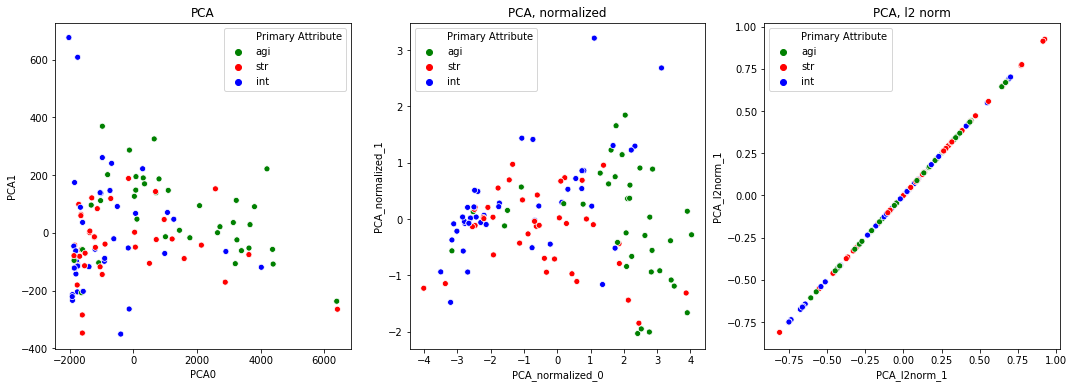

In [75]:
pca = PCA(n_components=2)
X_r = pca.fit(l2scaled).transform(l2scaled)
pca_df["PCA_l2norm_0"] = X_r[:, 0]
pca_df["PCA_l2norm_1"] = X_r[:, 1]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x="PCA0", y="PCA1", hue="Primary Attribute", data=pca_df, palette=palette, ax=axes[0])
sns.scatterplot(x="PCA_normalized_0", y="PCA_normalized_1", hue="Primary Attribute", data=pca_df, palette=palette, ax=axes[1])
sns.scatterplot(x="PCA_l2norm_1", y="PCA_l2norm_1", hue="Primary Attribute", data=pca_df, palette=palette, ax=axes[2])  # TIL L2 normalization doesn't work with PCA

axes[0].set_title("PCA")
axes[1].set_title("PCA, normalized")
axes[2].set_title("PCA, l2 norm")

plt.savefig("pca.png", bbox_inches="tight")

## Try other dimensionality reduction algorithms, all on normalized data

### Unsupervised methods

Text(0.5, 1.0, 'ICA')

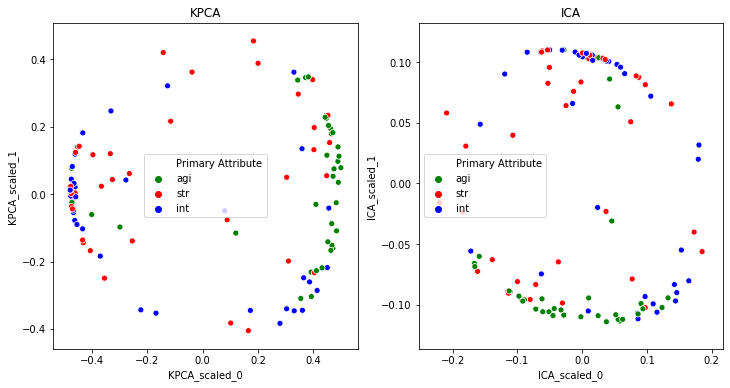

In [62]:
from sklearn.decomposition import KernelPCA, FastICA

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# KPCA
kpca = KernelPCA(kernel="rbf")
X_r = kpca.fit_transform(l2scaled)
pca_df["KPCA_scaled_0"] = X_r[:, 0]
pca_df["KPCA_scaled_1"] = X_r[:, 1]

sns.scatterplot(x="KPCA_scaled_0", y="KPCA_scaled_1", hue="Primary Attribute", 
                data=pca_df, palette=palette, ax=axes[0]);
axes[0].set_title("KPCA")

# ICA
ica = FastICA(n_components=2)
X_r = ica.fit_transform(l2scaled)
pca_df["ICA_scaled_0"] = X_r[:, 0]
pca_df["ICA_scaled_1"] = X_r[:, 1]

sns.scatterplot(x="ICA_scaled_0", y="ICA_scaled_1", hue="Primary Attribute", 
                data=pca_df, palette=palette, ax=axes[1]);
axes[1].set_title("ICA")

### Supervised methods

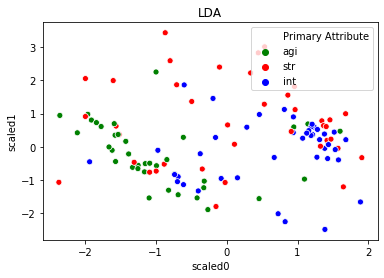

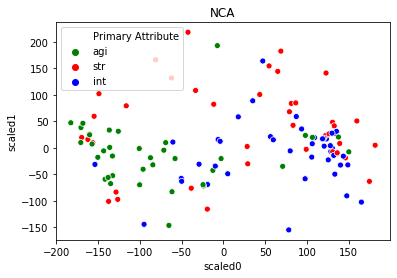

In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.model_selection import train_test_split

# encode attribute labels as integers
le = LabelEncoder()
y = le.fit_transform(hero_stats["Primary Attribute"])

# # Divide into training/testing data
X_train, X_test, y_train, y_test = train_test_split(l2scaled, y)

# make models
lda = LinearDiscriminantAnalysis(n_components=2)
nca = NeighborhoodComponentsAnalysis(n_components=2)

# list out dimensionality reduction methods
dim_reduction_methods = [('LDA', lda), ('NCA', nca)]

# make models
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    
    # fit
    model.fit(X_train, y_train)
    X_r = model.transform(l2scaled)

    # plot
    df = pd.DataFrame(X_r, columns=["scaled0", "scaled1"])
    df["Primary Attribute"] = hero_stats["Primary Attribute"]
    sns.scatterplot(x="scaled0", y="scaled1", hue="Primary Attribute", 
                    data=df, palette=palette)
    plt.title(name)
    
    plt.savefig(f"supervised_{name}.png", bbox_inches="tight")